In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
from collections import Counter

In [2]:
data = pd.read_csv('arxiv_papers.csv')

In [3]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-03
1,Hunting for the candidates of Changing-Look Bl...,The changing-look blazars (CLBs) are the blaza...,"['Shi-Ju Kang', 'Shan-Shan Ren', 'Yong-Gang Zh...",7.0,13.0,3.0,arxiv.org/pdf/2501.00094,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,['Active galactic nuclei (16) – Blazars (164) ...,2025-01-03
2,First unambiguous detection of ammonia in the ...,The newly accessible mid-infrared (MIR) window...,"['Mathilde Mâlin', 'Anthony Boccaletti', 'Clém...",6.0,18.0,4.0,arxiv.org/pdf/2501.00104,Earth and Planetary Astrophysics,NaN,A&A,NaN,"['Planetary systems', 'Stars: individual: GJ 5...",2025-01-03
3,Exchange of meteorites between the terrestrial...,The evolution of the orbits of bodies ejected ...,['S.I. Ipatov'],0.0,6.0,0.0,arxiv.org/pdf/2501.00134,Earth and Planetary Astrophysics,NaN,NaN,Modern astronomy: from the Early Universe to e...,['planets and satellites: terrestrial planets'],2025-01-03
4,Autoencoder Reconstruction of Cosmological Mic...,Enhanced modeling of microlensing variations i...,"['Somayeh Khakpash', 'Federica Bianco', 'Georg...",11.0,18.0,1.0,arxiv.org/pdf/2501.00153,Instrumentation and Methods for Astrophysics,NaN,The Astrophysical Journal,NaN,['- Interdisciplinary astronomy(804) 1'],2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,AGN star dynamics under the Influence of Outfl...,Stars with outflows interacting with ambient g...,"['Muxin Liu', 'Lile Wang', 'Peng Peng']",13.0,15.0,3.0,arxiv.org/pdf/2505.10524,Astrophysics of Galaxies,NaN,NaN,NaN,"['Stellar dynamics (1596)', 'Active galactic n...",2025-05-16
6357,ACT-ing on inflation: Implications of non Bunc...,We investigate a class of slow roll inflationa...,['Suvashis Maity'],2.0,12.0,0.0,arxiv.org/pdf/2505.10534,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,[],2025-05-16
6358,A Catalogue of Ultracompact Mass-Transferring ...,We present an overview and catalogue of all kn...,"['Matthew J. Green', 'Jan van Roestel', 'Tin L...",13.0,14.0,0.0,arxiv.org/pdf/2505.10535,Solar and Stellar Astrophysics,['Astrophysics of Galaxies'],A&A on 03 March 2025,NaN,['binaries: close'],2025-05-16
6359,A Systematic Search for Trace Molecules in Exo...,The first transmission spectrum of the habitab...,"['Lorenzo Pica-Ciamarra', 'Nikku Madhusudhan',...",5.0,38.0,8.0,arxiv.org/pdf/2505.10539,Earth and Planetary Astrophysics,NaN,NaN,NaN,[],2025-05-16


In [4]:
authors = data['authors'].tolist()
# Flatten the list of authors and count occurrences
all_authors = [author for sublist in authors for author in sublist.split(', ')]
author_counts = Counter(all_authors)

# Find the most common author
most_common_author, count = author_counts.most_common(1)[0]
print(f"The most repeated author is {most_common_author} and they were repeated {count} times.")

# Find the second most common author
second_most_common_author, count = author_counts.most_common(2)[1]
print(f"The second most repeated author is {second_most_common_author} and they were repeated {count} times.")

The most repeated author is 'J. Carretero' and they were repeated 71 times.
The second most repeated author is 'S. Bardelli' and they were repeated 58 times.


In [5]:
primary_subjects = data['primary_subject'].tolist()
# Flatten the list of primary subjects and count occurrences
all_primary_subjects = [subject for sublist in primary_subjects for subject in sublist.split(', ')]
primary_subject_counts = Counter(all_primary_subjects)

# Find the most common primary subject
most_common_primary_subject, count = primary_subject_counts.most_common(1)[0]
print(f"The most repeated primary subject is {most_common_primary_subject} and it was repeated {count} times.")

# Find the 2nd most common primary subject
most_common_primary_subject_2, count = primary_subject_counts.most_common(2)[1]
print(f"The second most repeated primary subject is {most_common_primary_subject_2} and it was repeated {count} times.")

The most repeated primary subject is Astrophysics of Galaxies and it was repeated 1700 times.
The second most repeated primary subject is High Energy Astrophysical Phenomena and it was repeated 1320 times.


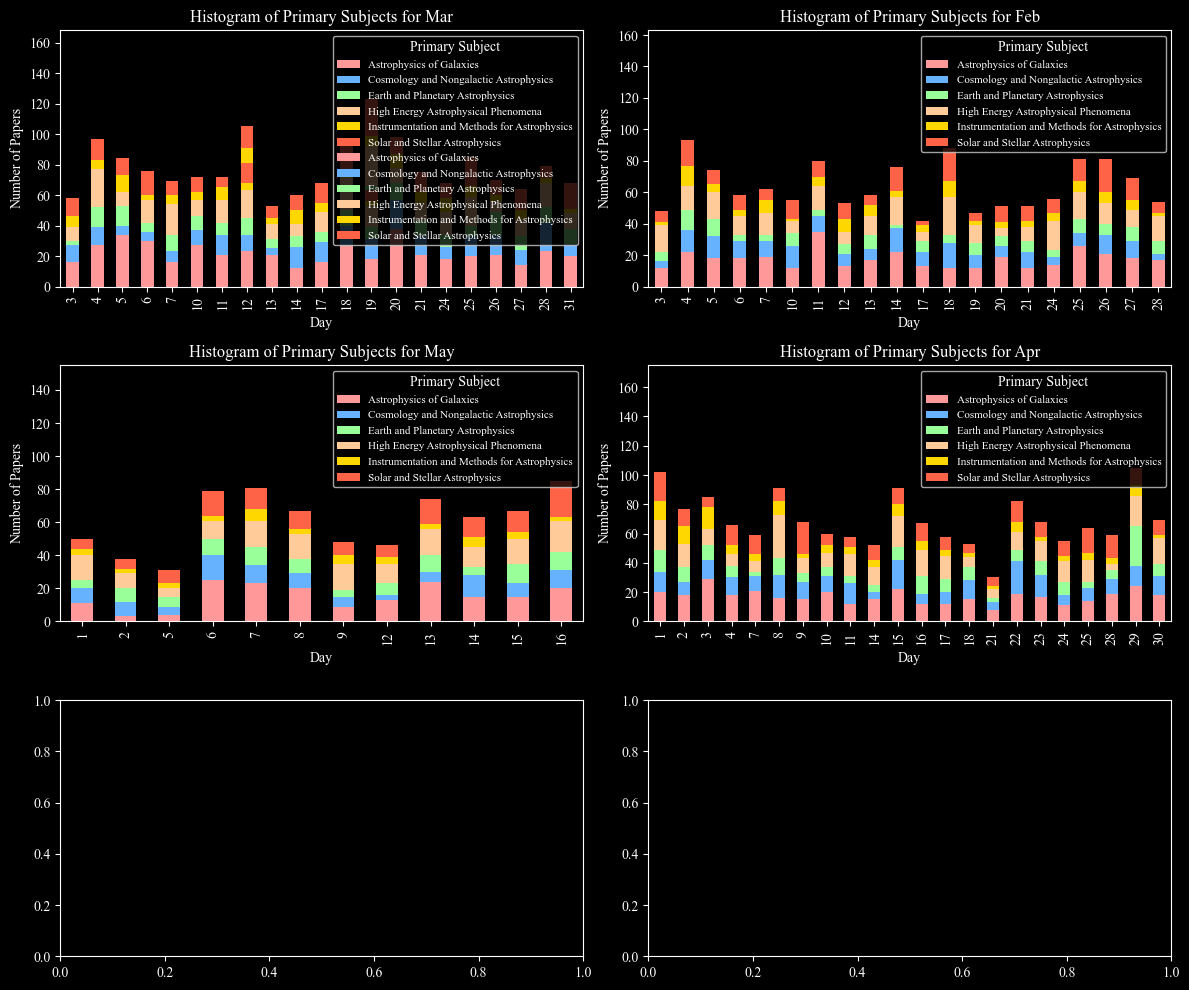

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

num_unique_months = data['month'].nunique()
list_unique_months = data['month'].unique()

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

for i in range(num_unique_months):
    ax = axs[i // 3, i % 2]
    masked_data = data[data['month'] == list_unique_months[i]]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    subject_counts_per_day.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_ylim(0, max(subject_counts_per_day.sum(axis=1)) + 70)
    ax.set_title(f'Histogram of Primary Subjects for {list_unique_months[i]}')
    ax.legend(title='Primary Subject', fontsize = 8, loc = 'upper right')

plt.tight_layout()
plt.show()


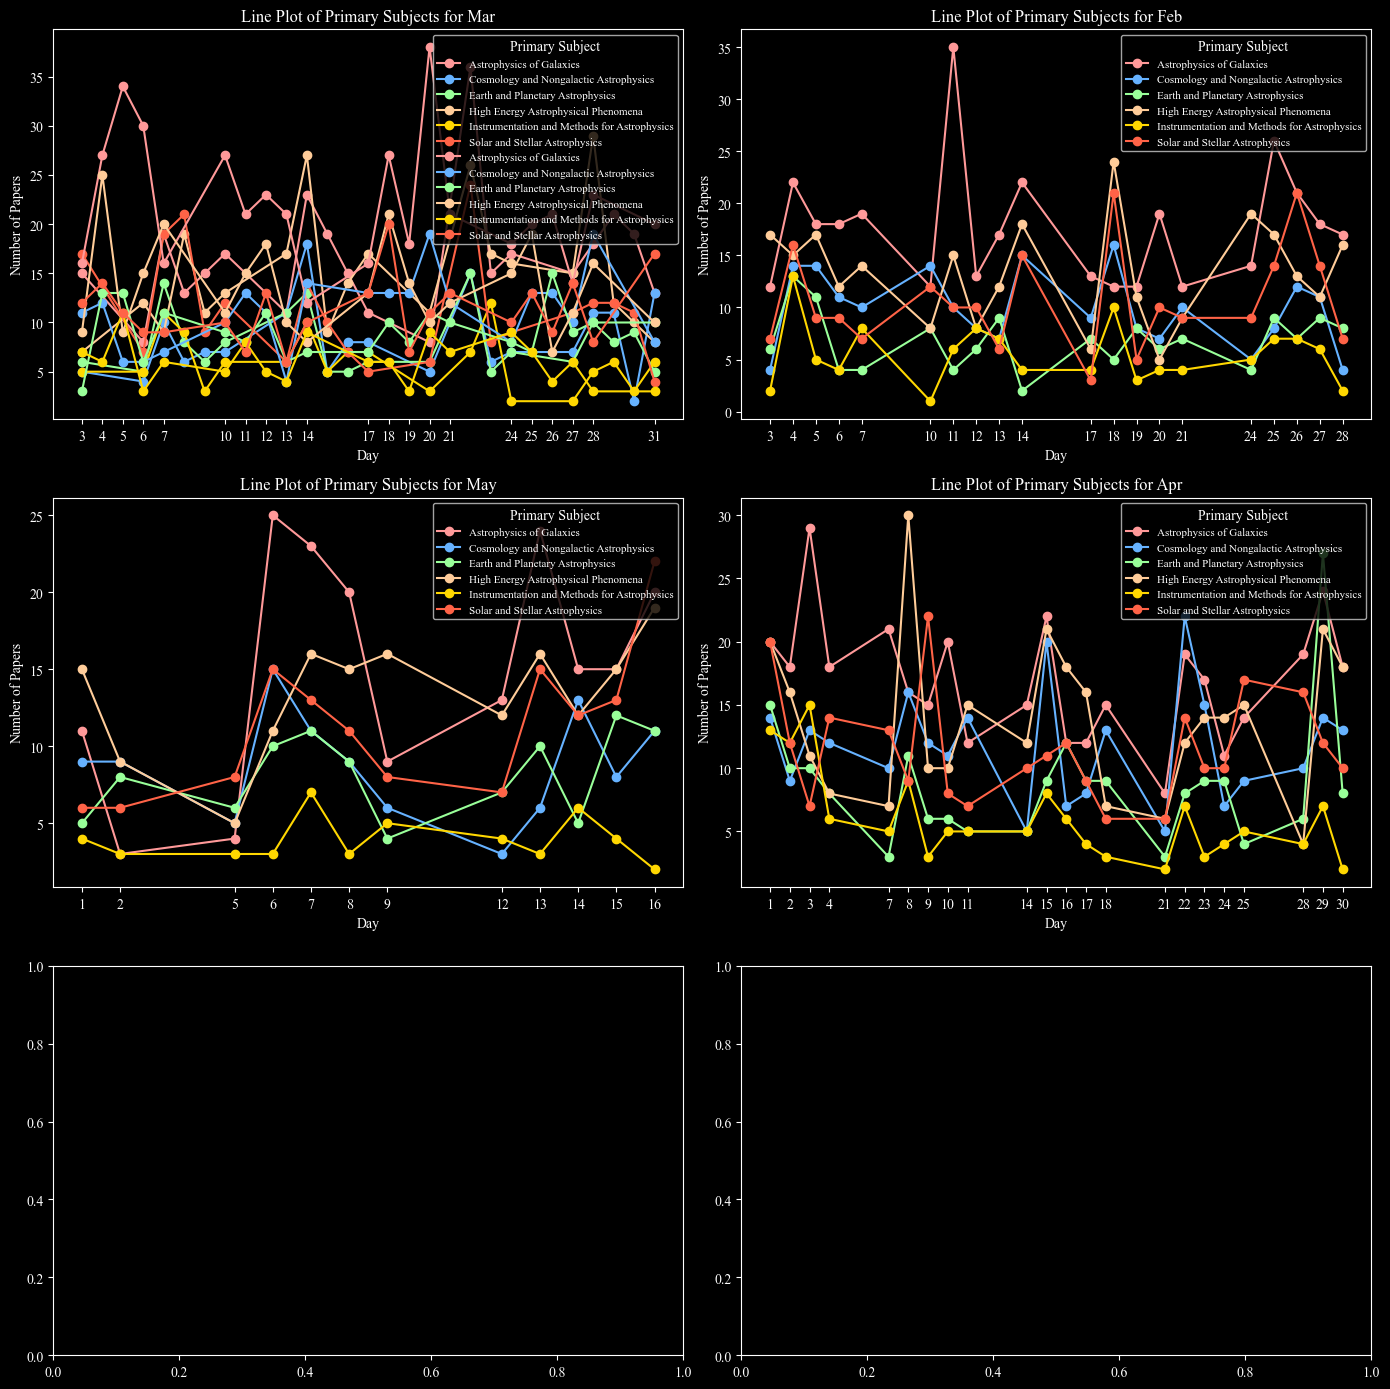

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

for i, month in enumerate(list_unique_months):
    ax = axs[i // 3, i % 2]
    masked_data = data[data['month'] == month]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    for j, subject in enumerate(subject_counts_per_day.columns):
        ax.plot(subject_counts_per_day.index, subject_counts_per_day[subject], color=colors[j], label=subject, marker='o')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_title(f'Line Plot of Primary Subjects for {month}')
    xticks_labels = [f"{day}" for day in subject_counts_per_day.index]
    ax.set_xticks(subject_counts_per_day.index)
    ax.set_xticklabels(xticks_labels, rotation=0)
    ax.legend(title='Primary Subject', fontsize=8, loc='upper right')

plt.tight_layout()
plt.show()

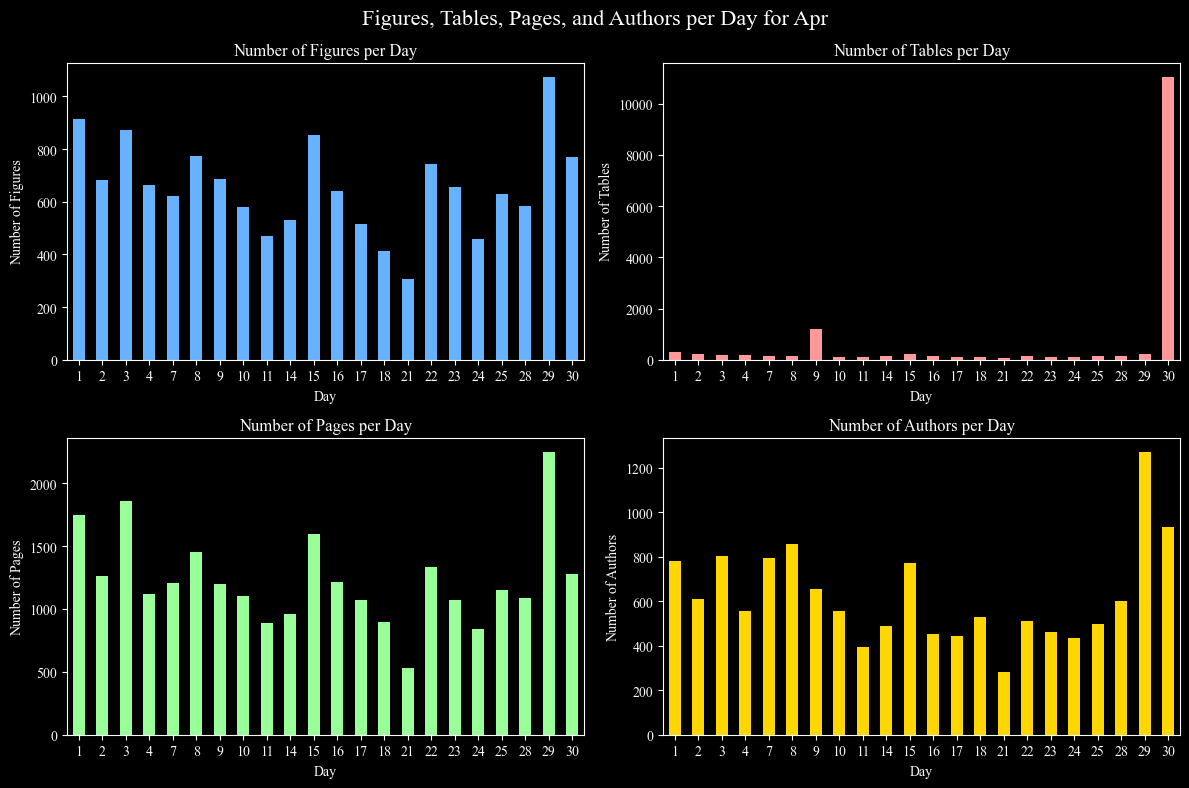

In [8]:

i = 3 # Month Number
masked_data = data[data['month'] == list_unique_months[i]]

figures_per_day = masked_data.groupby('day')['figures'].sum()
tables_per_day = masked_data.groupby('day')['tables'].sum()
pages_per_day = masked_data.groupby('day')['pages'].sum()
authors_per_day = masked_data.groupby('day')['authors'].apply(lambda x: x.str.split(', ').str.len().sum())

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_day.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Number of Figures')
ax[0, 0].set_title('Number of Figures per Day')
ax[0, 0].set_xticks(range(len(figures_per_day)))
ax[0, 0].set_xticklabels(figures_per_day.index, rotation=0)

tables_per_day.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Number of Tables')
ax[0, 1].set_title('Number of Tables per Day')
ax[0, 1].set_xticks(range(len(tables_per_day)))
ax[0, 1].set_xticklabels(tables_per_day.index, rotation=0)

pages_per_day.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Number of Pages')
ax[1, 0].set_title('Number of Pages per Day')
ax[1, 0].set_xticks(range(len(pages_per_day)))
ax[1, 0].set_xticklabels(pages_per_day.index, rotation=0)

authors_per_day.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Number of Authors')
ax[1, 1].set_title('Number of Authors per Day')
ax[1, 1].set_xticks(range(len(authors_per_day)))
ax[1, 1].set_xticklabels(authors_per_day.index, rotation=0)

plt.suptitle(f'Figures, Tables, Pages, and Authors per Day for {list_unique_months[i]}', fontsize=16)
plt.tight_layout()
plt.show()


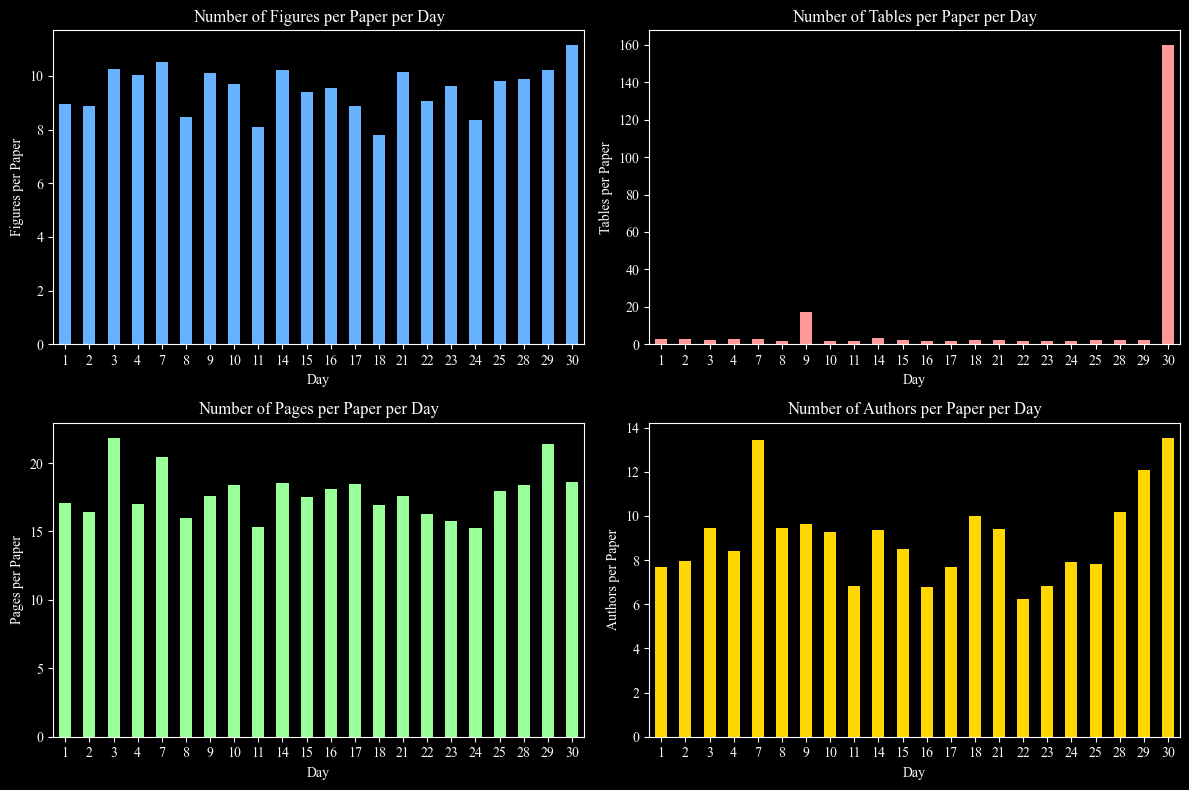

In [9]:
masked_data = data[data['month'] == list_unique_months[i]]

papers_per_day = masked_data.groupby('day').size()

figures_per_paper = figures_per_day / papers_per_day
tables_per_paper = tables_per_day / papers_per_day
pages_per_paper = pages_per_day / papers_per_day
authors_per_paper = authors_per_day / papers_per_day

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_paper.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Figures per Paper')
ax[0, 0].set_title('Number of Figures per Paper per Day')
ax[0, 0].set_xticks(range(len(figures_per_paper)))
ax[0, 0].set_xticklabels(figures_per_paper.index, rotation=0)

tables_per_paper.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Tables per Paper')
ax[0, 1].set_title('Number of Tables per Paper per Day')
ax[0, 1].set_xticks(range(len(tables_per_paper)))
ax[0, 1].set_xticklabels(tables_per_paper.index, rotation=0)

pages_per_paper.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Pages per Paper')
ax[1, 0].set_title('Number of Pages per Paper per Day')
ax[1, 0].set_xticks(range(len(pages_per_paper)))
ax[1, 0].set_xticklabels(pages_per_paper.index, rotation=0)

authors_per_paper.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Authors per Paper')
ax[1, 1].set_title('Number of Authors per Paper per Day')
ax[1, 1].set_xticks(range(len(authors_per_paper)))
ax[1, 1].set_xticklabels(authors_per_paper.index, rotation=0)

plt.tight_layout()
plt.show()


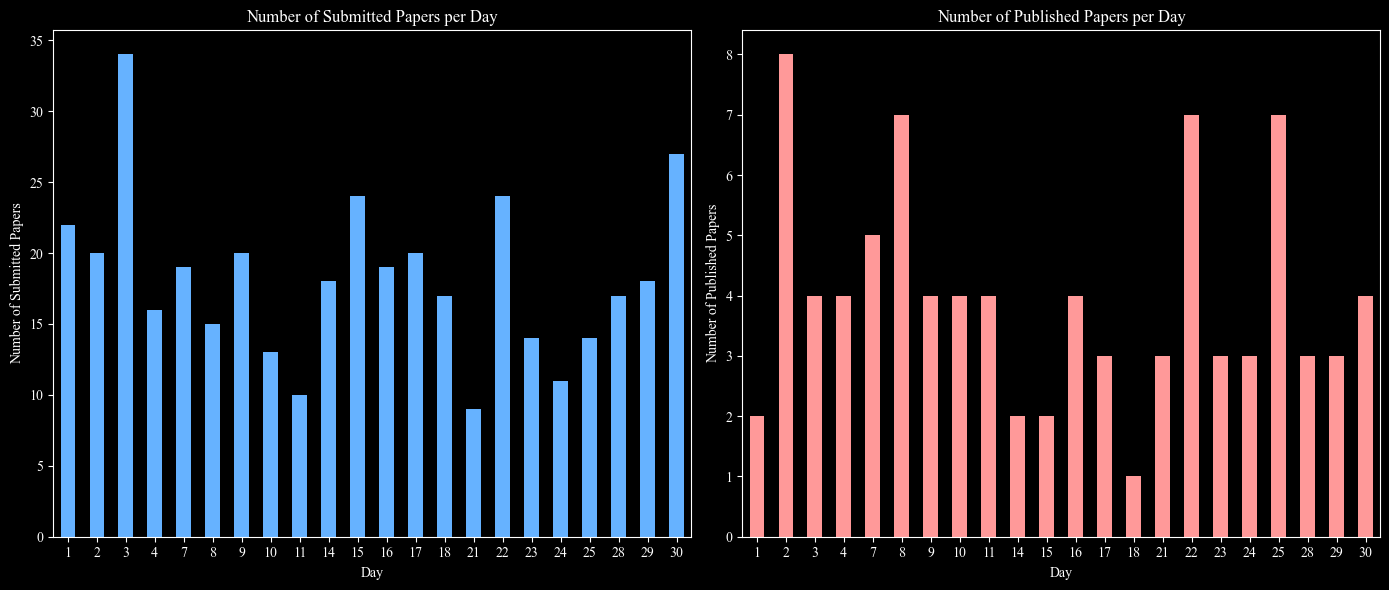

In [10]:
masked_data = data[data['month'] == list_unique_months[i]]
submitted_papers_per_day = masked_data.groupby('day')['submitted_journal'].count()
published_papers_per_day = masked_data.groupby('day')['published_journal'].count()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

submitted_papers_per_day.plot(kind='bar', ax=ax[0], color='#66B2FF')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Number of Submitted Papers')
ax[0].set_title('Number of Submitted Papers per Day')
ax[0].set_xticks(range(len(submitted_papers_per_day)))
ax[0].set_xticklabels(submitted_papers_per_day.index, rotation=0)

published_papers_per_day.plot(kind='bar', ax=ax[1], color='#FF9999')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Published Papers')
ax[1].set_title('Number of Published Papers per Day')
ax[1].set_xticks(range(len(published_papers_per_day)))
ax[1].set_xticklabels(published_papers_per_day.index, rotation=0)

plt.tight_layout()
plt.show()

In [11]:
keywords = data['keywords'].tolist()

# Flatten the list of keywords and count occurrences
all_keywords = [keyword for sublist in keywords for keyword in sublist.split(', ')]
keyword_counts = Counter(all_keywords)

# Find the most common keyword
most_common_keyword, count = keyword_counts.most_common(1)[0]
print(f"The most repeated keyword is {most_common_keyword} and it was repeated {count} times.")

# Second most common keyword
second_most_common_keyword, count = keyword_counts.most_common(2)[1]
print(f"The second most repeated keyword is {second_most_common_keyword} and it was repeated {count} times.")


The most repeated keyword is [] and it was repeated 1793 times.
The second most repeated keyword is 'accretion'] and it was repeated 36 times.


In [ ]:
# Find the author papers
author = 'Jose'
papers = data[data['authors'].str.contains(author)]
papers


,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,day,month
20,A Novel Survey for Young Substellar Objects wi...,We present a study of very low-mass stars and ...,"['Tanvi Sharma', 'Wen-Ping Chen', 'Beth Biller...",35.0,25.0,4.0,arxiv.org/pdf/2501.00433,Solar and Stellar Astrophysics,['Astrophysics of Galaxies'],The Astrophysical Journal,NaN,[],2025-01-03,3,Jan
58,A Near-IR Search for Helium in the Superlumino...,"We present a detailed study of SN 2024ahr, a h...","['Harsh Kumar', 'Edo Berger', 'Peter K. Blanch...",7.0,20.0,2.0,arxiv.org/pdf/2501.01485,High Energy Astrophysical Phenomena,"['Astrophysics of Galaxies', 'Solar and Stella...",NaN,NaN,['Supernovae() — Optical astronomy() — Transie...,2025-01-06,6,Jan
67,An Integral Field Unit for the Binospec Spectr...,Binospec is a wide-field optical (360 to 1000 ...,"['Daniel Fabricant', 'Sagi Ben-Ami', 'Igor Chi...",11.0,12.0,1.0,arxiv.org/pdf/2501.01528,Instrumentation and Methods for Astrophysics,NaN,PASP,NaN,"['Spectroscopy — Astronomical Optics 1', 'are ...",2025-01-06,6,Jan
96,Sporadic Dips from Extended Debris Transiting ...,We present the discovery of deep but sporadic ...,"['J. J. Hermes', 'Joseph A. Guidry', 'Zachary ...",5.0,13.0,5.0,arxiv.org/pdf/2501.02050,Solar and Stellar Astrophysics,['Earth and Planetary Astrophysics'],NaN,NaN,['White dwarf stars (1799) — Transits (1711) —...,2025-01-07,7,Jan
104,Effects of Galaxy Cluster Structure on Lensed ...,Strong gravitational lenses come in many forms...,"['Luka Vujeva', 'Jose María Ezquiaga', 'Rico K...",10.0,13.0,0.0,arxiv.org/pdf/2501.02096,Cosmology and Nongalactic Astrophysics,['General Relativity and Quantum Cosmology'],NaN,NaN,[],2025-01-07,7,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,DESI DR1 Lyα 1D power spectrum: The Fast Fouri...,We present the one-dimensional Lyman-alpha for...,"['Corentin Ravoux', 'Marie-Lynn Abdul-Karim', ...",16.0,40.0,0.0,arxiv.org/pdf/2505.09493,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,[],2025-05-15,15,May
6280,Homogeneous measurements of proximity zone siz...,The overionized regions surrounding high-redsh...,"['Silvia Onorato', 'Joseph F. Hennawi', 'Elia ...",15.0,33.0,6.0,arxiv.org/pdf/2505.09676,Astrophysics of Galaxies,['Cosmology and Nongalactic Astrophysics'],NaN,NaN,['during which the inter- galactic medium (IGM...,2025-05-16,16,May
6319,Star formation efficiency and scaling relation...,Numerical simulations predict that clumps ($\s...,"['V. Rawat', 'M. R. Samal', 'A. Zavagno', 'Sam...",14.0,19.0,4.0,arxiv.org/pdf/2505.10173,Astrophysics of Galaxies,NaN,NaN,NaN,['ISM: clouds'],2025-05-16,16,May
6334,An Eccentric Sub-Neptune Moving Into the Evapo...,"Though missions such as Kepler, K2, and TESS h...","['Sydney Jenkins', 'Andrew Vanderburg', 'Ritik...",10.0,21.0,3.0,arxiv.org/pdf/2505.10324,Earth and Planetary Astrophysics,['Solar and Stellar Astrophysics'],AAS Journals,NaN,"['exoplanet dynamics', 'planetary systems', 'e...",2025-05-16,16,May
